In [16]:
import tensorflow as tf

print("tensorflow version:", tf.__version__)

tensorflow version: 2.4.1


# Loading MNIST dataset

In [17]:
mnist = tf.keras.datasets.mnist
print(mnist)

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>


__Train Test Split__

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
import matplotlib.pyplot as plt

__A single image is represented as a 2D matrix.__

In [20]:
print(X_train[0], X_train.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

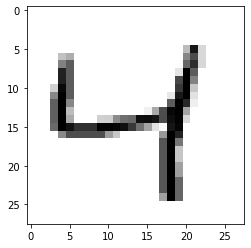

In [21]:
plt.imshow(X_train[2], cmap=plt.cm.binary)

# Scaling features (`X`)

In [30]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10498298 0.34940902 0.3689874  0.34978968 0.15370495
 0.04089933 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


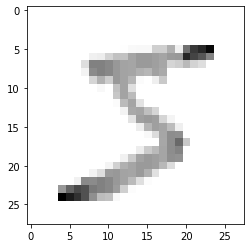

In [32]:
plt.imshow(X_train[0], cmap=plt.cm.binary)


# Building a model

Building a model:
1. Input layer takes the 28x28 image as a flat 1x784 vector.
2. The two hidden layers each have 128 neurons.
3. The output layer has 10 neurons representing the 10 numbers of the decimal system.

In [24]:
# Initializing model
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten())
# Hidden Layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Hidden Layer 2
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compiling model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Training model

In [39]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 0.9977
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0083 - accuracy: 0.9976
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0052 - accuracy: 0.9985
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.006

# Evaluating model

In [40]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss     :", val_loss)
print("Validation accuracy :", val_acc)

313/313 [==============================] - 0s 774us/step - loss: 0.1739 - accuracy: 0.9746
Validation loss     : 0.1739095151424408
Validation accuracy : 0.9746000170707703


# Saving & Loading Models

In [41]:
model_name = "digit_reader_seq.model"

In [42]:
model.save(model_name)

FailedPreconditionError: digit_reader_seq.model is not a directory

In [ ]:
new_model = tf.keras.models.load_model(model_name)

# Prediction

In [ ]:
new_mod_preds = new_model.predict([X_test])

Checking if prediction is correct:


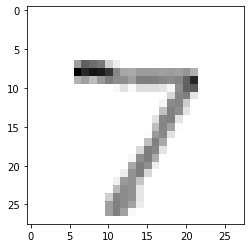

In [ ]:
print("Checking if prediction is correct:")
plt.imshow(X_test[0], cmap=plt.cm.binary)

In [ ]:
print("Model pridiction:", new_mod_preds[0].argmax())

Model pridiction: 7
